<a href="https://colab.research.google.com/github/SnehPhilip/NeuralNetwork_imageclassification/blob/main/ANN_on_FlattenedImage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##   Image Classification
### - using Flattened Deep ANN

Dataset: Fashion MNIST data
[60000 grayscale images of 28X28 dimension]

In [ ]:
!pip install tensorflow
!pip install matplotlib

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

print(" Training images shape:", train_images.shape)
print(" Testing images shape:", test_images.shape)


In [ ]:
#print(train_images.shape)

train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 155, 236, 207, 178, 107, 156, 161, 109,  64,  23,  77, 130,
         72,  15],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
         69, 207, 223, 218, 216, 216, 163, 127, 121, 122, 146, 141,  88,
        172,  66],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,   0,
        200, 232, 232, 233, 229, 223, 223, 215, 213, 164, 127, 123, 196,
        229,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        183, 225, 216, 223, 228, 235, 227, 224, 222, 224, 221, 223, 245,
        173,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        193, 228, 218, 213, 198, 180, 212, 210, 211, 213, 223, 220, 243,
        202,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   3,   0,  12,
        219, 220, 212, 218, 192, 169, 227, 208, 218, 224, 212, 226, 197,
        209,  52],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,  99,
        244, 222, 220, 218, 203, 198, 221, 215, 213, 222, 220, 245, 119,
        167,  56],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,  55,
        236, 228, 230, 228, 240, 232, 213, 218, 223, 234, 217, 217, 209,
         92,   0],
       [  0,   0,   1,   4,   6,   7,   2,   0,   0,   0,   0,   0, 237,
        226, 217, 223, 222, 219, 222, 221, 216, 223, 229, 215, 218, 255,
         77,   0],
       [  0,   3,   0,   0,   0,   0,   0,   0,   0,  62, 145, 204, 228,
        207, 213, 221, 218, 208, 211, 218, 224, 223, 219, 215, 224, 244,
        159,   0],
       [  0,   0,   0,   0,  18,  44,  82, 107, 189, 228, 220, 222, 217,
        226, 200, 205, 211, 230, 224, 234, 176, 188, 250, 248, 233, 238,
        215,   0],
       [  0,  57, 187, 208, 224, 221, 224, 208, 204, 214, 208, 209, 200,
        159, 245, 193, 206, 223, 255, 255, 221, 234, 221, 211, 220, 232,
        246,   0],
       [  3, 202, 228, 224, 221, 211, 211, 214, 205, 205, 205, 220, 240,
         80, 150, 255, 229, 221, 188, 154, 191, 210, 204, 209, 222, 228,
        225,   0],
       [ 98, 233, 198, 210, 222, 229, 229, 234, 249, 220, 194, 215, 217,
        241,  65,  73, 106, 117, 168, 219, 221, 215, 217, 223, 223, 224,
        229,  29],
       [ 75, 204, 212, 204, 193, 205, 211, 225, 216, 185, 197, 206, 198,
        213, 240, 195, 227, 245, 239, 223, 218, 212, 209, 222, 220, 221,
        230,  67],
       [ 48, 203, 183, 194, 213, 197, 185, 190, 194, 192, 202, 214, 219,
        221, 220, 236, 225, 216, 199, 206, 186, 181, 177, 172, 181, 205,
        206, 115],
       [  0, 122, 219, 193, 179, 171, 183, 196, 204, 210, 213, 207, 211,
        210, 200, 196, 194, 191, 195, 191, 198, 192, 176, 156, 167, 177,
        210,  92],
       [  0,   0,  74, 189, 212, 191, 175, 172, 175, 181, 185, 188, 189,
        188, 193, 198, 204, 209, 210, 210, 211, 188, 188, 194, 192, 216,
        170,   0],
       [  2,   0,   0,   0,  66, 200, 22

In [ ]:
train_images_reshaped = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images_reshaped = test_images.reshape((test_images.shape[0], 28, 28, 1))

train_images_reshaped[0]


In [ ]:
train_labels_one_hot = keras.utils.to_categorical(train_labels, num_classes=10)
test_labels_one_hot = keras.utils.to_categorical(test_labels, num_classes=10)

train_labels_one_hot




array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
print("Training images shape:", train_images.shape)
print("Testing images shape:", test_images.shape)
print("Training images reshape:", train_images_reshaped.shape)
print("Testing images reshape:", test_images_reshaped.shape)


print("Training labels shape:", train_labels_one_hot.shape)
print("Testing labels shape:", test_labels_one_hot.shape)

Training images shape: (60000, 28, 28)
Testing images shape: (10000, 28, 28)
Training images reshape: (60000, 28, 28, 1)
Testing images reshape: (10000, 28, 28, 1)
Training labels shape: (60000, 10)
Testing labels shape: (10000, 10)


In [ ]:
ann_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28, 1)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

ann_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

ann_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

model_checkpoint_ann = keras.callbacks.ModelCheckpoint(
    filepath='best_ann_model_weights.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

print("Training ANN model...")
ann_history = ann_model.fit(
    train_images,
    train_labels_one_hot,
    epochs=30,
    batch_size=60,
    validation_data=(test_images, test_labels_one_hot),
    callbacks=[early_stopping, model_checkpoint_ann]
)
print("ANN model training finished.")

Training ANN model...
Epoch 1/30
 995/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7071 - loss: 8.9193
Epoch 1: val_loss improved from inf to 0.86074, saving model to best_ann_model_weights.weights.h5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7074 - loss: 8.8860 - val_accuracy: 0.7666 - val_loss: 0.8607
Epoch 2/30
 993/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7973 - loss: 0.6893
Epoch 2: val_loss improved from 0.86074 to 0.63157, saving model to best_ann_model_weights.weights.h5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7973 - loss: 0.6889 - val_accuracy: 0.8039 - val_loss: 0.6316
Epoch 3/30
 996/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8260 - loss: 0.5107
Epoch 3: val_loss did not improve from 0.63157
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8260 - loss: 0.5107 - val_accuracy: 0.7900 - val_loss: 0.6490
Epoch 4/30
 990/1000 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8323 - loss: 0.4798
Epoch 4: val_loss imp

In [ ]:
ann_model.evaluate(test_images, test_labels_one_hot, verbose=0)
# here the accuracy is 86.9 after training without callbacks

[0.4118254482746124, 0.8589000105857849]

In [ ]:
ann_model.load_weights('best_ann_model_weights.weights.h5')
ann_model.evaluate(test_images, test_labels_one_hot, verbose=0)


[0.4118254482746124, 0.8589000105857849]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


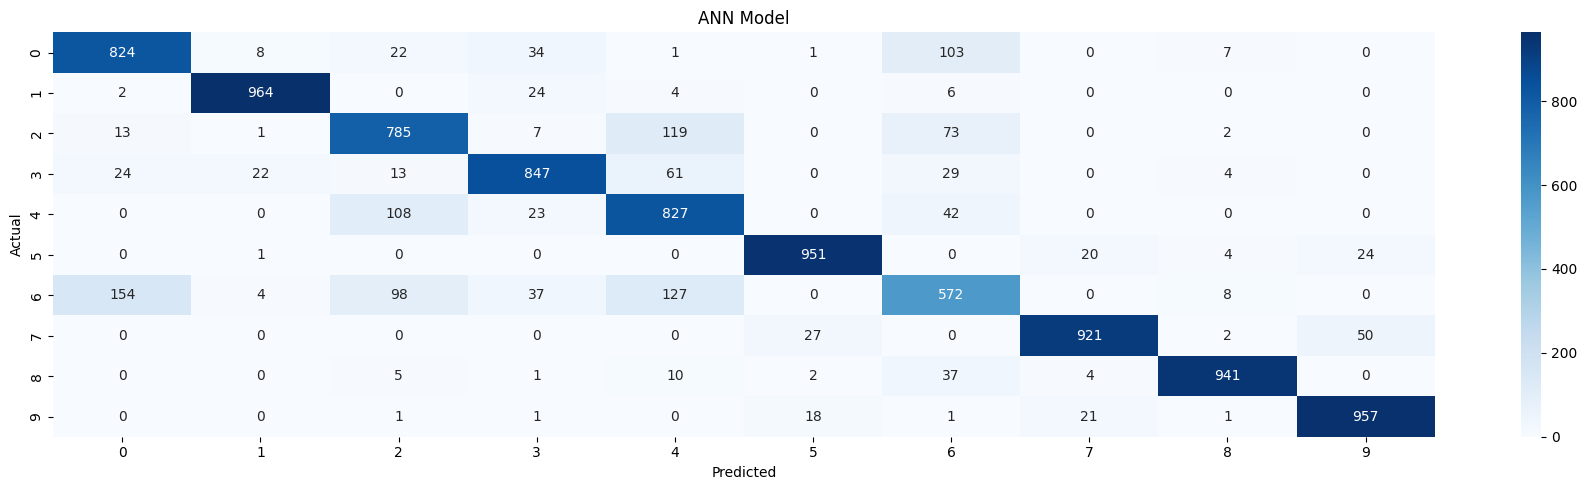

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predictions
ann_predictions = ann_model.predict(test_images)

# Convert labels
test_labels_int = np.argmax(test_labels_one_hot, axis=1)

ann_predicted_labels = np.argmax(ann_predictions, axis=1)

# Confusion matrices
cm_ann = confusion_matrix(test_labels_int, ann_predicted_labels)
# Plot side by side
fig, axis = plt.subplots(figsize=(18, 5))

sns.heatmap(cm_ann, annot=True, fmt="d", cmap="Blues", ax=axis)
axis.set_title("ANN Model")
axis.set_xlabel("Predicted")
axis.set_ylabel("Actual")


plt.tight_layout()
plt.show()

In [ ]:
# Define class names for Fashion-MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [ ]:
#print(train_images.shape)

i = int(input("Enter a random index: "))

print("The image at index "+str(i)+" is")
test_images[i]


Enter a random index: 78
The image at index 78 is


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [ 10,  53,  41,  41,  44,  45,  43,  42,  44,  50,  45,  43,  42,
         38,  38,  38,  36,  38,  38,  37,  39,  38,  40,  40,  40,  41,
         42,   1],
       [ 27,  95,  54,  69,  55,  54,  51,  53,  54,  57,  54,  57,  60,
         63,  64,  64,  62,  64,  69,  64,  63,  59,  58,  58,  58,  56,
         67,  38],
       [  6,  49,   1,  23,  16,  17,  19,  20,  22,  21,  14,  13,  14,
          9,   9,   9,   9,  10,  13,  12,  15,  14,  16,  21,  15,  15,
         32,  58],
       [ 10, 116,  89,  96, 102, 105, 105, 101, 103, 110,  98,  95,  97,
         88,  87,  87,  87,  84,  75,  79,  85,  86,  90, 102,  93,  95,
        109,  88],
       [  6, 125, 104,  98,  90,  94,  97,  97,  94,  98,  94,  95,  93,
         92,  97,  99, 100,  98,  92, 104,  98,  97,  98,  96, 105, 103,
        104,  86],
       [  1, 115,  94,  93,  95,  96,  95,  92,  89,  90,  89,  91,  91,
         93,  98,  97,  95,  97,  95,  95,  97, 100,  99,  96, 101,  92,
         99,  95],
       [  2, 116,  95,  93,  96,  97,  94,  92,  93,  97,  98,  99, 102,
         95,  99,  96,  92,  96,  97,  90,  96, 103,  97, 106,  96, 101,
         99, 117],
       [ 17, 164,  55, 101, 100,  94,  94,  97, 100,  93,  95,  94,  96,
         90,  98,  96,  93,  97,  97,  98,  97, 108,  96,  98, 113,  79,
        101, 194],
       [  6, 204, 135,  47,  78,  95,  94, 101,  92,  86,  99,  99,  92,
         90,  99,  94,  96,  96,  97,  97,  93, 104, 104, 105,  69,  80,
        241, 201],
       [  0, 226, 232, 170,  91,  62,  71,  88,  98, 102,  94,  96,  98,
         93,  96,  90,  95, 101, 104, 107,  98,  85,  69,  78, 158, 249,
        249, 165],
       [  0, 214, 238, 238, 251, 186, 115,  70,  62,  68,  83,  82,  89,
         86,  89,  79,  95,  82,  75,  62,  75, 100, 164, 245, 255, 229,
        233, 166],
       [  0, 214, 229, 222, 226, 249, 255, 234, 172, 126,  96,  99,  96,
         83,  63,  79, 124, 104, 118, 164, 218, 254, 255, 238, 222, 223,
        249, 164],
       [  0, 248, 232, 226, 226, 216, 220, 235, 255, 237, 227, 238, 153,
         57,  90, 104, 156, 239, 232, 236, 242, 225, 219, 227, 227, 220,
        249, 165],
       [  0, 246, 230, 221, 220, 222, 223, 217, 215, 221, 222, 237, 132,
         63, 105,  86, 105, 237, 219, 215, 216, 222, 227, 224, 227, 220,
        252, 154],
       [  0, 239, 232, 222, 224, 223, 223, 223, 224, 228, 220, 255, 130,
         58,  84,  59, 125, 255, 217, 224, 224, 221, 224, 224, 226, 218,
        254, 152],
       [  0, 221, 238, 219, 224, 223, 224, 224, 224, 226, 225, 255,  84,
          6,  41,  10,  75, 255, 218, 222, 223, 222, 224, 223, 225, 217,
        252, 147],
       [  0, 231, 235, 223, 225, 224, 225, 224, 225, 222, 223, 235, 223,
        215, 211, 206, 211, 241, 219, 222, 222, 223, 223, 222, 224, 216,
        252, 145],
       [  4, 207, 230, 225, 225, 223, 222, 221, 219, 220, 223, 222, 230,
        234, 236, 235, 230, 221, 224, 224, 222, 220, 223, 221, 224, 219,
        231, 141],
       [  0, 199, 244, 224, 226, 226, 228, 228, 230, 229, 227, 224, 221,
        220, 219, 218, 219, 220, 220, 220, 221, 221, 220, 220, 220, 219,
        239, 131],
       [  0, 175, 216, 211, 233, 229, 224, 220, 216, 210, 205, 224, 237,
        241, 242, 241, 241, 239, 237, 235, 232, 231, 235, 234, 233, 230,
        255,  19],
       [104, 114,  68,  76,  76,  79,  82,  84,  89,  86,  76, 117,  93,
         70,  75,  73,  76,  69,  50,  45,  37,  33,  38,  35,  31,  22,
          4,   0],
       [  8,  35,  50,  47,  41,  41,  3

In [ ]:
print("The model predicts it to be ")

p=ann_predicted_labels[i]
print(class_names[p])

The model predicts it to be 
Bag
